# Decision Trees

Decision Trees are a type of supervised learning algorithm that is mostly used for classification problems, but is also capable of performing regression, multi-output tasks, and even unsupervised learning. They are one of the most powerful and popular algorithms due to their simplicity, interpretability, and versatility.

## Usage
Decision Trees are used for handling non-linear data sets effectively. They are used in various domains such as engineering, civil planning, law, and business. The decision tree tool is used in real life in many areas, such as engineering, civil planning, law, and business. Decision trees can be divided into two types; categorical variable and continuous variable decision trees.

## Assumptions
The fundamental assumption of Decision Trees is that the data is partitioned according to attribute values. This means that the data is divided based on specific conditions or criteria, such as the value of a particular attribute.

## Examples
1. **Healthcare**: Decision Trees are used in the healthcare sector for diagnosing diseases based on symptoms or predicting the likelihood of certain health conditions.
2. **Finance**: In finance, Decision Trees are used for options pricing models, credit scoring, and loan approvals.
3. **Marketing**: Decision Trees can help target a specific audience by predicting potential customer behavior.
4. **Quality Control**: Decision Trees are used in manufacturing processes for quality control.

Despite their simplicity, Decision Trees are a powerful tool in Data Science. They are easy to understand and interpret, can handle both categorical and numerical data, and can handle multi-output problems. However, they can be prone to overfitting, especially when dealing with datasets with many features. Therefore, techniques such as pruning are often used to improve the model's performance.


# Деревья решений

Деревья решений - это тип алгоритма обучения с учителем, который в основном используется для задач классификации, но также способен выполнять регрессию, многозадачные задачи и даже обучение без учителя. Они являются одним из самых мощных и популярных алгоритмов благодаря их простоте, интерпретируемости и универсальности.

## Использование
Деревья решений используются для эффективной работы с нелинейными наборами данных. Они используются в различных областях, таких как инженерия, градостроительство, право и бизнес. Инструмент дерева решений используется в реальной жизни во многих областях, таких как инженерия, градостроительство, право и бизнес. Деревья решений можно разделить на два типа: деревья решений для категориальных переменных и деревья решений для непрерывных переменных.

## Предположения
Основное предположение деревьев решений заключается в том, что данные разбиваются в соответствии с значениями атрибутов. Это означает, что данные делятся на основе определенных условий или критериев, таких как значение определенного атрибута.

## Примеры
1. **Здравоохранение**: Деревья решений используются в секторе здравоохранения для диагностики заболеваний на основе симптомов или прогнозирования вероятности определенных состояний здоровья.
2. **Финансы**: В финансах деревья решений используются для моделей ценообразования опционов, кредитного скоринга и утверждения займов.
3. **Маркетинг**: Деревья решений могут помочь нацелиться на определенную аудиторию, предсказывая потенциальное поведение клиентов.
4. **Контроль качества**: Деревья решений используются в процессах производства для контроля качества.

Несмотря на их простоту, деревья решений - мощный инструмент в Data Science. Они легко понимаются и интерпретируются, могут обрабатывать как категориальные, так и числовые данные, и могут обрабатывать многозадачные проблемы. Однако они могут быть склонны к переобучению, особенно при работе с наборами данных с большим количеством функций. Поэтому часто используются такие техники, как прунинг (обрезка), чтобы улучшить производительность модели.

100%|██████████| 9912422/9912422 [00:00<00:00, 82648752.77it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 53223064.07it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25278859.13it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14631742.53it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Accuracy: 0.8779


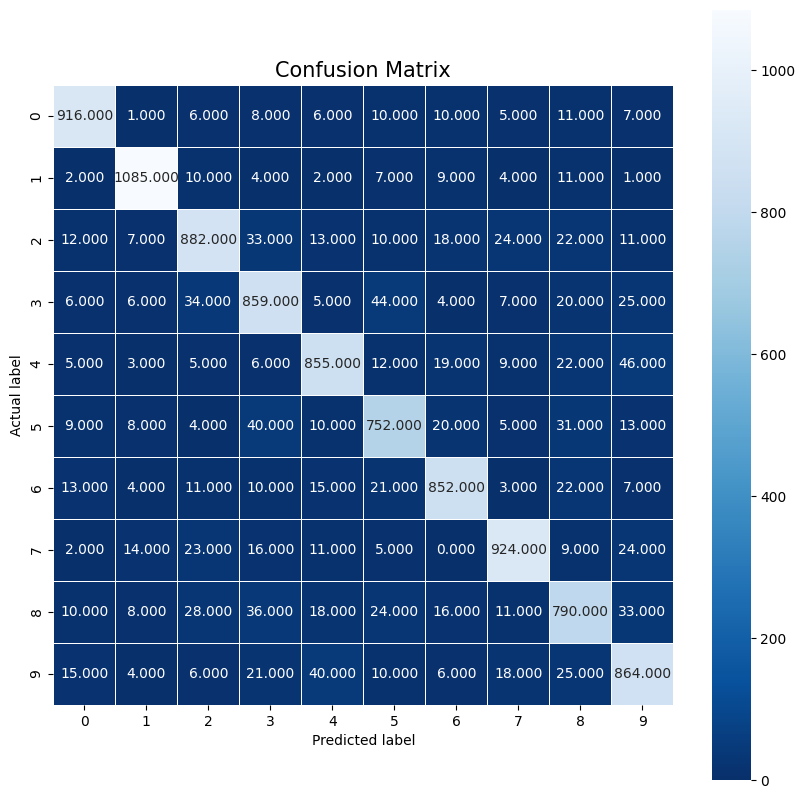

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class DTClassifier:
    """
    A class used to represent a Decision Tree (DT) Classifier.

    ...

    Attributes
    ----------
    clf : sklearn.tree.DecisionTreeClassifier
        The DT classifier from scikit-learn.
    X_train : numpy.ndarray
        The training data.
    y_train : numpy.ndarray
        The training labels.
    X_test : numpy.ndarray
        The test data.
    y_test : numpy.ndarray
        The test labels.
    predictions : numpy.ndarray
        The predictions made by the classifier on the test data.

    Methods
    -------
    load_data():
        Loads the MNIST data.
    train():
        Trains the DT classifier.
    predict():
        Makes predictions on the test data.
    accuracy():
        Returns the accuracy of the classifier.
    plot_confusion_matrix():
        Plots a confusion matrix of the classifier's predictions.
    """

    def __init__(self):
        """
        Constructs all the necessary attributes for the DTClassifier object.
        """

        self.clf = DecisionTreeClassifier()

    def load_data(self):
        """Loads the MNIST data."""

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
        testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

        # Use DataLoader to handle batching of the data
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=True)

        # Convert the data to numpy arrays
        traindata = next(iter(trainloader))
        testdata = next(iter(testloader))

        self.X_train = traindata[0].numpy().reshape(traindata[0].shape[0], -1)
        self.y_train = traindata[1].numpy()

        self.X_test = testdata[0].numpy().reshape(testdata[0].shape[0], -1)
        self.y_test = testdata[1].numpy()

    def train(self):
        """Trains the DT classifier."""

        self.clf.fit(self.X_train, self.y_train)

    def predict(self):
        """Makes predictions on the test data."""

        self.predictions = self.clf.predict(self.X_test)

    def accuracy(self):
        """Returns the accuracy of the classifier."""

        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        """Plots a confusion matrix of the classifier's predictions."""

        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

# Example usage:
dt_classifier = DTClassifier()
dt_classifier.load_data()
dt_classifier.train()
dt_classifier.predict()
print("Accuracy:", dt_classifier.accuracy())
dt_classifier.plot_confusion_matrix()


Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split. Decision Trees are prone to overfitting, especially when the tree is particularly deep. To avoid overfitting, techniques such as setting the maximum depth of the tree or pruning can be used.

Деревья решений - это тип обучения с учителем в машинном обучении, при котором данные непрерывно разделяются в соответствии с определенным параметром. Дерево можно объяснить двумя сущностями, а именно узлами решений и листьями. Листья - это решения или окончательные результаты. А узлы решений - это места, где происходит разделение данных. Деревья решений склонны к переобучению, особенно когда дерево особенно глубокое. Чтобы избежать переобучения, можно использовать такие техники, как установка максимальной глубины дерева или обрезка.